In [13]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import torch
from lib.uilt_module import CurveLoss
from loader.DataLoader import read_dataframe
from loader.DataTransformer import lag_list

from model.ResidualLstmModel import ResidualLstmModel

In [2]:
# Parameters
LAG = 15
WAVE = 4

In [3]:
# prepare data
df = read_dataframe('all')
sequence = df.to_numpy()
y_var = np.var(sequence[:, -1])

shifted_sequence = lag_list(sequence, LAG + 1)  # shift into delayed sequences

x = shifted_sequence[:, :-1, 1:]  # for each delayed sequence, take all elements except last element
y = shifted_sequence[:, -1, -1].reshape(-1, 1)  # for each delayed sequence, only take the last element

x = torch.from_numpy(x.astype('float64')).type(torch.Tensor)  # convert to tensor
y = torch.from_numpy(y.astype('int32')).type(torch.Tensor)  # convert to tensor

if WAVE == 1:
    x_train, y_train = x[52-LAG : 103-LAG], y[52-LAG : 103-LAG]
if WAVE == 2:
    x_train, y_train = x[160-LAG : 280-LAG], y[160-LAG : 280-LAG]
elif WAVE == 3:
    x_train, y_train = x[280-LAG : 505-LAG], y[280-LAG : 505-LAG]
elif WAVE == 4:
    x_train, y_train = x[757-LAG : 871-LAG], y[757-LAG : 871-LAG]

In [4]:
input_dim = x_train.shape[-1]
hidden_dim = 64
num_layers = 4
output_dim = 1
num_epochs = 3_000 # 3_000

model = ResidualLstmModel(input_dim, hidden_dim, num_layers, output_dim)

In [5]:
# train
loss_fn = CurveLoss(model, 0)
optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
min_loss = np.inf
best_model_state = None
model.train()

for epoch in range(1, num_epochs + 1):
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    if epoch % 100 == 0:
        print("Epoch: %d | MSE: %.2E | RRSE: %.2E" % (epoch, loss.item(), np.sqrt(loss.item() / y_var)))
    if min_loss > loss.item():
        best_model_state = copy.deepcopy(model.state_dict())
        min_loss = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch: 100 | MSE: 2.99E+03 | RRSE: 1.25E-02
Epoch: 200 | MSE: 2.27E+03 | RRSE: 1.09E-02
Epoch: 300 | MSE: 1.81E+03 | RRSE: 9.72E-03
Epoch: 400 | MSE: 1.47E+03 | RRSE: 8.74E-03
Epoch: 500 | MSE: 8.89E+02 | RRSE: 6.80E-03
Epoch: 600 | MSE: 3.46E+02 | RRSE: 4.24E-03
Epoch: 700 | MSE: 2.46E+02 | RRSE: 3.58E-03
Epoch: 800 | MSE: 2.15E+02 | RRSE: 3.35E-03
Epoch: 900 | MSE: 1.79E+02 | RRSE: 3.05E-03
Epoch: 1000 | MSE: 1.51E+02 | RRSE: 2.81E-03
Epoch: 1100 | MSE: 1.34E+02 | RRSE: 2.64E-03
Epoch: 1200 | MSE: 1.27E+02 | RRSE: 2.57E-03
Epoch: 1300 | MSE: 1.21E+02 | RRSE: 2.51E-03
Epoch: 1400 | MSE: 1.16E+02 | RRSE: 2.45E-03
Epoch: 1500 | MSE: 1.12E+02 | RRSE: 2.42E-03
Epoch: 1600 | MSE: 1.10E+02 | RRSE: 2.39E-03
Epoch: 1700 | MSE: 1.07E+02 | RRSE: 2.36E-03
Epoch: 1800 | MSE: 1.06E+02 | RRSE: 2.34E-03
Epoch: 1900 | MSE: 1.03E+02 | RRSE: 2.32E-03
Epoch: 2000 | MSE: 1.01E+02 | RRSE: 2.29E-03
Epoch: 2100 | MSE: 9.98E+01 | RRSE: 2.28E-03
Epoch: 2200 | MSE: 9.85E+01 | RRSE: 2.26E-03
Epoch: 2300 | MSE: 

In [24]:
y_train_detach = y_train.detach().numpy().reshape(-1)
y_pred_detach = y_pred.detach().numpy().reshape(-1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


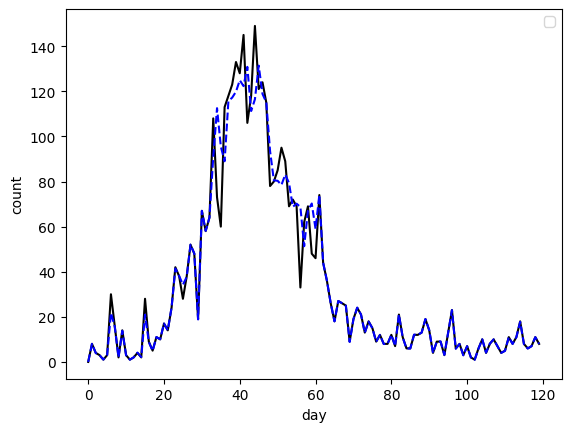

In [27]:
plt.plot(range(len(y_train_detach)), y_train_detach, color='black')
plt.plot(range(len(y_pred_detach)), y_pred_detach, 'b--')
plt.ylabel("count")
plt.xlabel("day")
plt.legend()
plt.show()

In [387]:
df_sim = df.copy()

In [388]:
# df_sim['avg_temp'] = 40
# df_sim['avg_humid'] = 80

In [389]:
df_sim['avg_temp'] = 40
df_sim['avg_humid'] = 80
# df_sim['people8'] = 1
# df_sim['hotel_21'] = 1

In [390]:
# df_sim.loc[200:, 'avg_humid'] = 100
# df_sim.loc[200:, 'people8'] = 1 

In [391]:
# prepare data
seq_sim = df_sim.to_numpy()
shifted_seq_sim = lag_list(seq_sim, LAG + 1)  # shift into delayed sequences

x_y_sim = shifted_seq_sim[:, :-1, 1:]  # for each delayed sequence, take all elements except last element
x_y_sim = torch.from_numpy(x_y_sim.astype('float64')).type(torch.Tensor)  # convert to tensor

if WAVE == 1:
    x_y_sim = x_y_sim[52-LAG : 103-LAG]
if WAVE == 2:
    x_y_sim = x_y_sim[160-LAG : 280-LAG]
elif WAVE == 3:
    x_y_sim = x_y_sim[280-LAG : 505-LAG]
elif WAVE == 4:
    x_y_sim = x_y_sim[757-LAG : 871-LAG]

In [392]:
x_sim = x_y_sim[:,:,:-1]
y_sim_init = x_y_sim[:,:,-1][0]

In [393]:
y_sim = y_sim_init.clone().detach()
# prediction_range = 7
for i in range(x_sim.shape[0]):
    y_sim_new = model(torch.cat([x_sim[i][None,:,:], y_sim[i:i+LAG][None,:,None]], dim=2))
    y_sim = torch.cat([y_sim, y_sim_new.reshape(1).detach()])

In [394]:
y_true_detach = x_y_sim[:,0,-1].detach().numpy().reshape(-1)
y_sim_detach = y_sim.detach().numpy().reshape(-1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


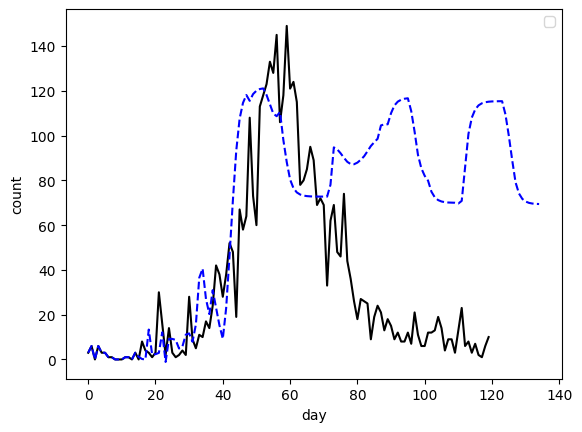

In [395]:
plt.plot(range(len(y_true_detach)), y_true_detach, color='black')
plt.plot(range(len(y_sim_detach)), y_sim_detach, 'b--')
plt.ylabel("count")
plt.xlabel("day")
plt.legend()
plt.show()